<a href="https://colab.research.google.com/github/Sindhuja-bodapati/FMML-LAB-1/blob/main/FMML_Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

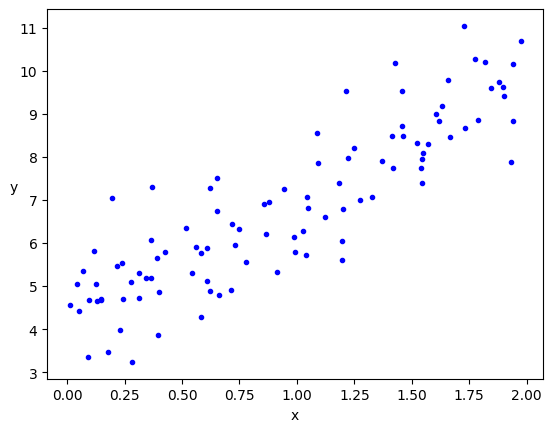

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

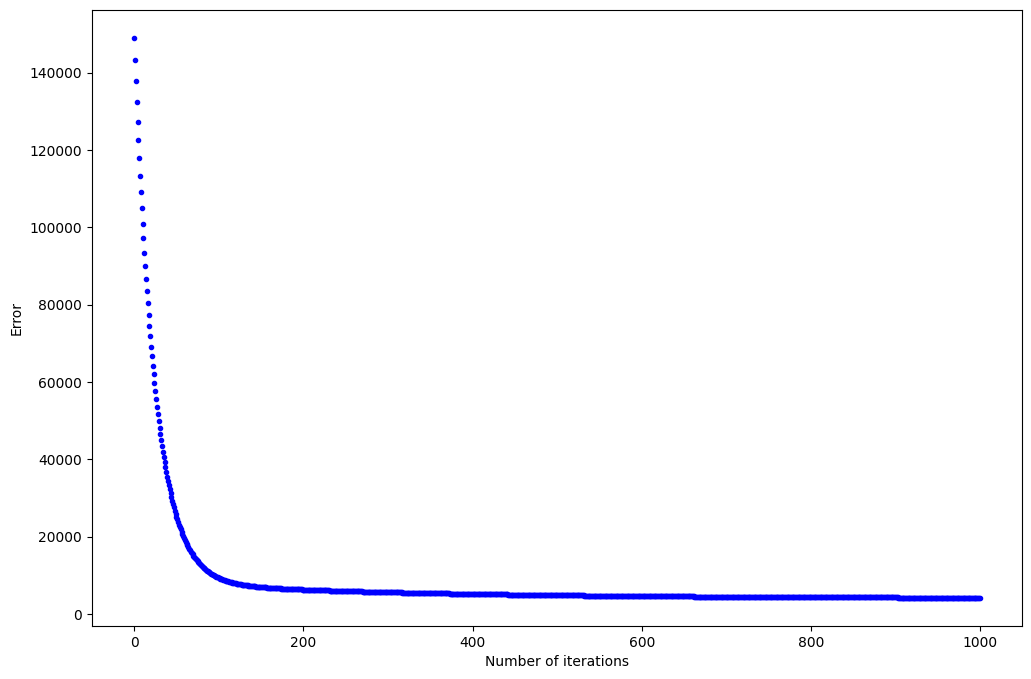

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

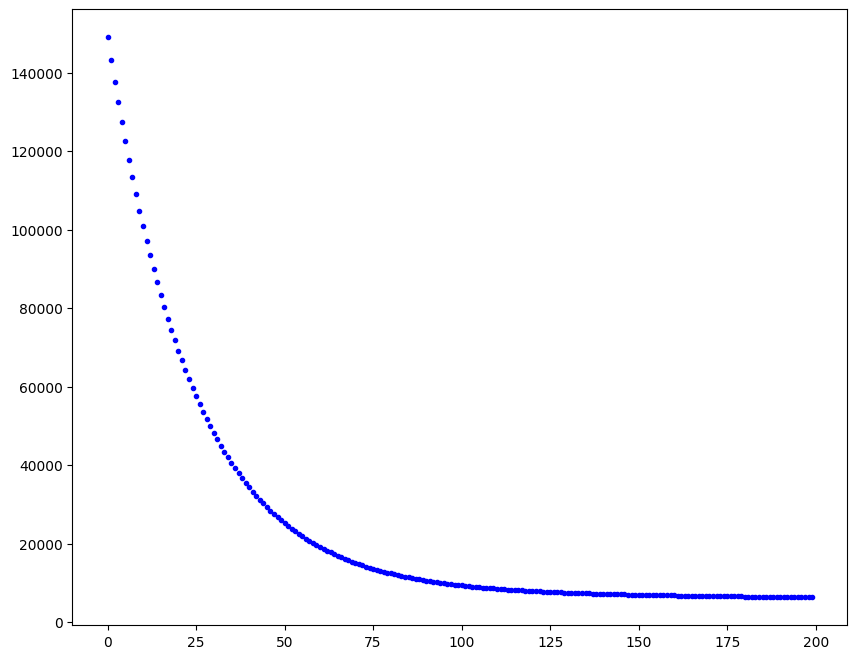

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


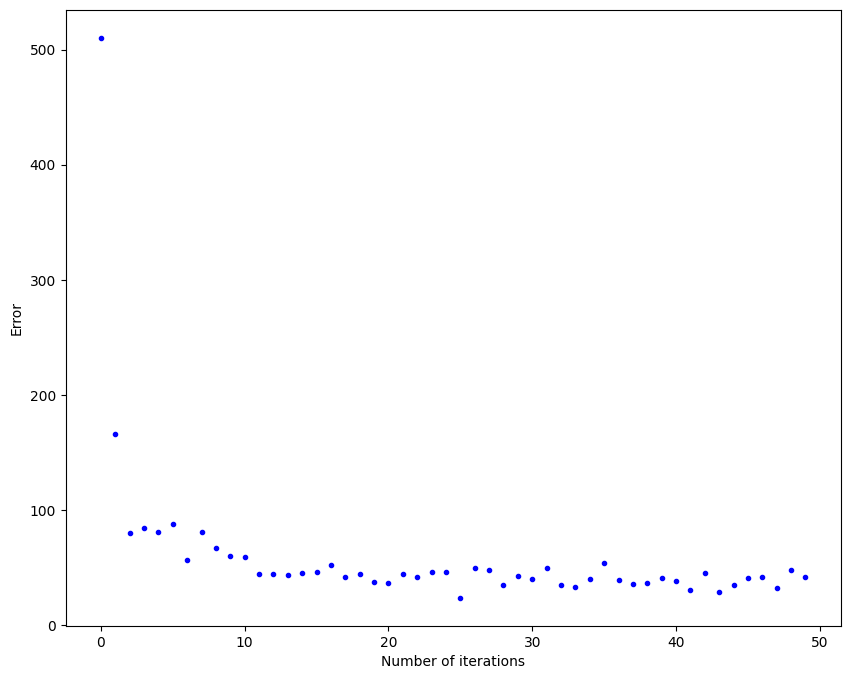

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


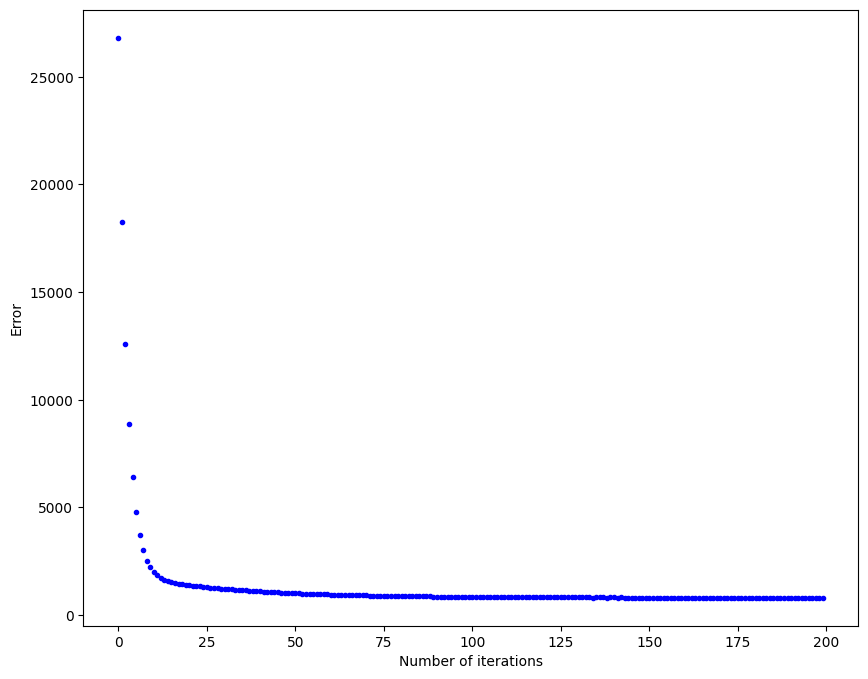

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

ANSWERS
1.In mini-batch gradient descent, the batch size determines the number of examples used in each iteration to compute the gradient and update the model parameters. Adjusting the batch size can have an impact on the convergence speed, memory requirements, and the quality of the updates.

Here's a brief explanation of the effects of changing the batch size:

Small Batch Size (e.g., 1 to 32):

Pros: Faster iterations, less memory usage. Can converge faster due to more frequent updates.
Cons: Noisier updates, may have more variance in convergence.
Medium Batch Size (e.g., 32 to 256):

Pros: A balance between the pros and cons of small and large batch sizes.
Cons: Moderate memory usage.
Large Batch Size (e.g., 256 and above):

Pros: Smoother updates, potentially more stable convergence.
Cons: Slower iterations, higher memory usage.
Changing the batch size often involves trade-offs between computation efficiency and the quality of the updates. Smaller batch sizes can lead to faster convergence but may introduce more noise in the updates. Larger batch sizes may provide more stable updates but can slow down the training process.

Here's an example in a deep learning context using TensorFlow and Keras to

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset for illustration purposes
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a simple neural network model
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with stochastic gradient descent optimizer
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Experiment with different batch sizes
batch_sizes = [32, 128, 512]

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}\n")
    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2)


11490434/11490434 [==============================] - 0s 0us/step

Training with batch size: 32

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7239 - accuracy: 0.8224 - val_loss: 0.3790 - val_accuracy: 0.8995
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3612 - accuracy: 0.8995 - val_loss: 0.3072 - val_accuracy: 0.9153
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3066 - accuracy: 0.9146 - val_loss: 0.2750 - val_accuracy: 0.9237
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2759 - accuracy: 0.9227 - val_loss: 0.2511 - val_accuracy: 0.9293
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2535 - accuracy: 0.9291 - val_loss: 0.2338 - val_accuracy: 0.9352

Training with batch size: 128

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2382 - accuracy: 0.9337 - val_loss: 0.2300 - val_accuracy: 0.9359
Epoch 2/5
375/37

2.Certainly, to test the impact of different batch sizes on real datasets, we can use a common dataset such as the MNIST dataset for digit recognition. We'll train a simple neural network model using TensorFlow and Keras with different batch sizes and compare their performance.


Training with batch size: 32

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7140 - accuracy: 0.8224 - val_loss: 0.3765 - val_accuracy: 0.8996
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3576 - accuracy: 0.9017 - val_loss: 0.3047 - val_accuracy: 0.9145
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3042 - accuracy: 0.9149 - val_loss: 0.2739 - val_accuracy: 0.9217
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2733 - accuracy: 0.9236 - val_loss: 0.2506 - val_accuracy: 0.9277
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2505 - accuracy: 0.9300 - val_loss: 0.2335 - val_accuracy: 0.9337

Training with batch size: 128

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 0.2350 - accuracy: 0.9351 - val_loss: 0.2281 - val_accuracy: 0.9355
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.2306 -

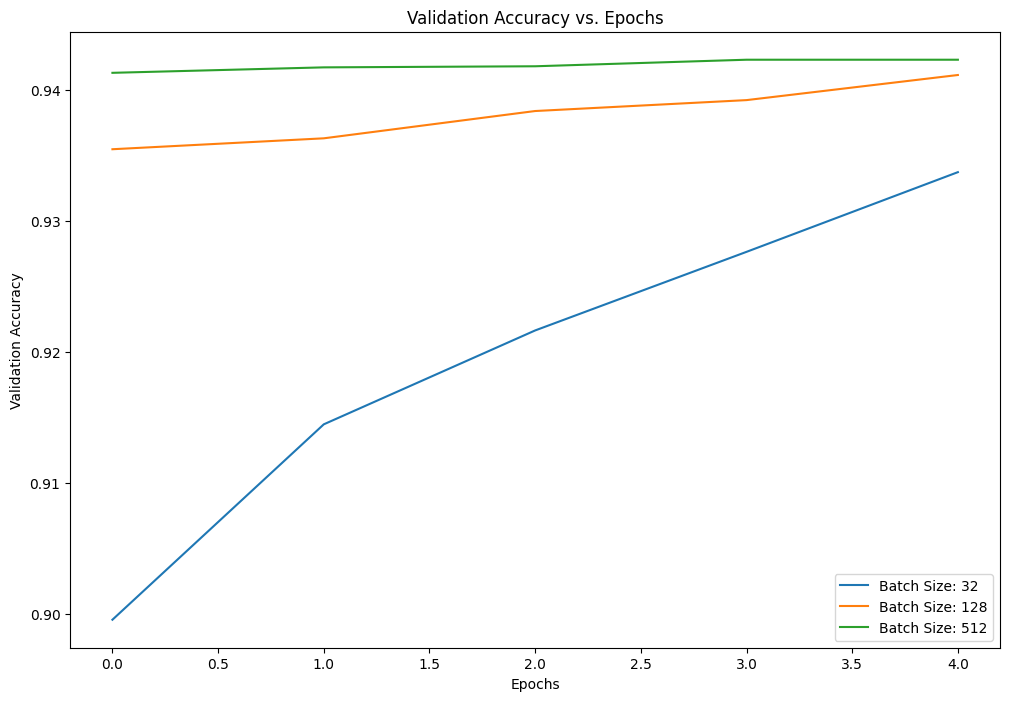

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with stochastic gradient descent optimizer
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Experiment with different batch sizes
batch_sizes = [32, 128, 512]
histories = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}\n")
    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2)
    histories.append(history)

# Evaluate and compare the models
for i, batch_size in enumerate(batch_sizes):
    print(f"\nEvaluation results for batch size: {batch_size}")
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, batch_size in enumerate(batch_sizes):
    plt.plot(histories[i].history['val_accuracy'], label=f'Batch Size: {batch_size}')

plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


3.Certainly! Changing the learning rate can have a significant impact on the training process in different gradient descent variants: Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent. Here, I'll provide an example using a simple quadratic function to illustrate the effects.

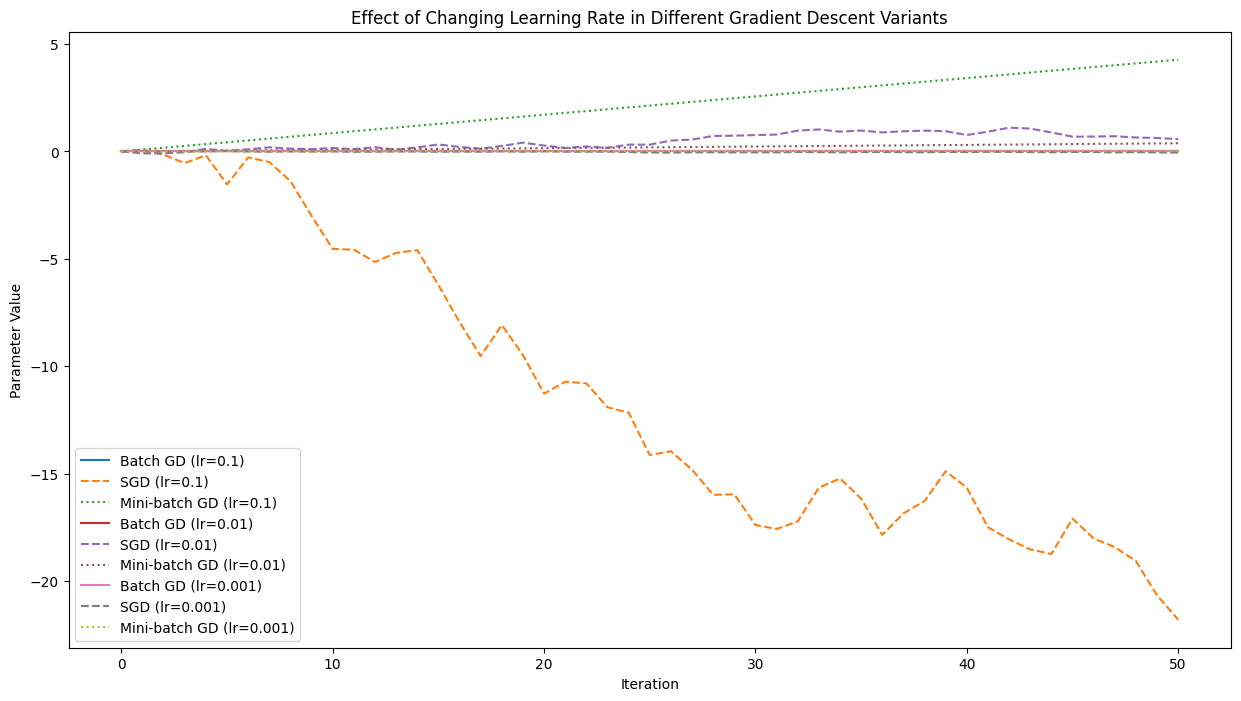

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple quadratic function
def quadratic_function(x):
    return x**2 + 5

# Define the derivative of the quadratic function
def gradient(x):
    return 2 * x

# Batch Gradient Descent
def batch_gradient_descent(learning_rate, num_iterations):
    x = 0.0  # Initial guess
    x_history = [x]

    for i in range(num_iterations):
        x = x - learning_rate * gradient(x)
        x_history.append(x)

    return x_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(learning_rate, num_iterations):
    x = 0.0  # Initial guess
    x_history = [x]

    for i in range(num_iterations):
        random_point = np.random.uniform(-10, 10)  # Random data point
        x = x - learning_rate * gradient(random_point)
        x_history.append(x)

    return x_history

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(learning_rate, num_iterations, batch_size):
    x = 0.0  # Initial guess
    x_history = [x]

    # Generate random data points for mini-batch
    data_points = np.random.uniform(-10, 10, size=batch_size)

    for i in range(num_iterations):
        gradient_sum = np.sum(gradient(data_points))
        x = x - learning_rate * gradient_sum / batch_size
        x_history.append(x)

    return x_history

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001]
num_iterations = 50
batch_size = 10  # for mini-batch GD

# Plot the results for Batch GD, SGD, and Mini-batch GD
plt.figure(figsize=(15, 8))

for lr in learning_rates:
    # Batch GD
    batch_gd_history = batch_gradient_descent(lr, num_iterations)
    plt.plot(batch_gd_history, label=f'Batch GD (lr={lr})')

    # SGD
    sgd_history = stochastic_gradient_descent(lr, num_iterations)
    plt.plot(sgd_history, label=f'SGD (lr={lr})', linestyle='--')

    # Mini-batch GD
    mini_batch_gd_history = mini_batch_gradient_descent(lr, num_iterations, batch_size)
    plt.plot(mini_batch_gd_history, label=f'Mini-batch GD (lr={lr})', linestyle=':')

plt.title('Effect of Changing Learning Rate in Different Gradient Descent Variants')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.legend()
plt.show()
